In [42]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from zipfile import ZipFile

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### **1. Preliminary Data Analysis and Cleaning**

In [43]:
zip_path = r"C:\Users\Welcome Sir\Downloads\wine+quality (1).zip"

with ZipFile(zip_path, "r") as zip_ref:
    zip_ref.printdir()

with ZipFile(zip_path) as z:
    with z.open('winequality-white.csv') as f:
        white_wine = pd.read_csv(f, sep=";")
        print("\nWhite wine successfully loaded...")

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305

White wine successfully loaded...


In [44]:
# Let's copy the file into df
df = white_wine.copy()

# Display the first 6 rows
print("\nDisplaying the first 6 rows:\n")
df.head(6)




Displaying the first 6 rows:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [45]:
# Checking for the dataset shape
print("\nChecking for the shape of data:")
rows, columns = df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)



Checking for the shape of data:
Number of rows: 4898
Number of columns: 12


In [46]:
# Checking for missing values
missing_values = df.isna().sum()
missing_values
# if missing_values > 0:
#     print(f"The number of missing values: {missing_values}")
# else:
#     print("No missing values in the data. Hence, nothing to handle.")


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
# Checking for duplicate
print(f"Number of duplicate before dropping: {df.duplicated().sum()}")

Number of duplicate before dropping: 937


In [48]:
# # Since there are duplicates, I will be dropping them all.
df = df.drop_duplicates()
print(f"\nNumber of duplicate after dropping: {df.duplicated().sum()}")


Number of duplicate after dropping: 0


In [49]:
# Checking data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Summary of the data cleaning actions**
- I loaded the data from the zipfile and stored as `white_wine`. After that, it was copied to `df`
- There was no missing values in the data, hence no cleaning was done as regard that.
- There were `937` duplicates which was later dropped.
- All data types are okay by me.

### **2. Exploratory Data Analysis (EDA) and Scaling**

In [50]:
# To perform univariate Analysis on my data, I need to separate the columns into both `numerical` and `categorical`

# Performing the numerical features
num_col = df.select_dtypes(include='number').drop(columns='quality')
num_col.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [51]:
# Univariate Analysis
def univariate_analysis(df, column):
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}:")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

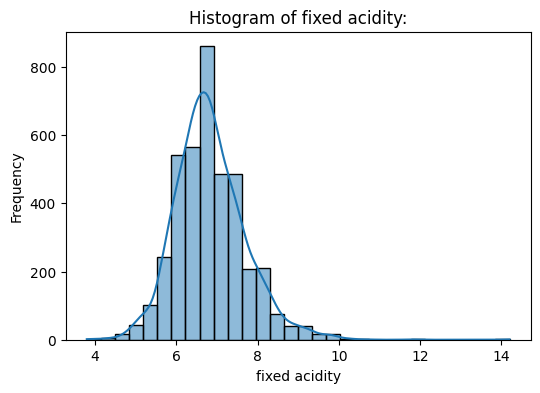

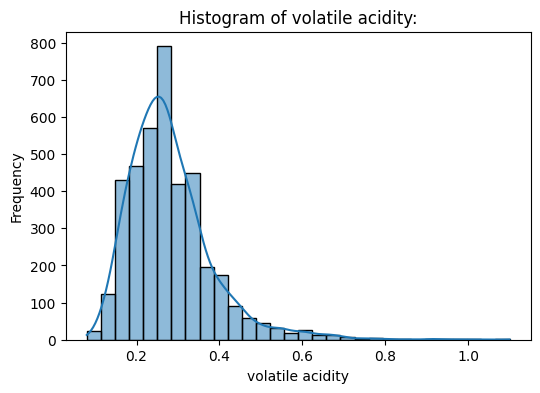

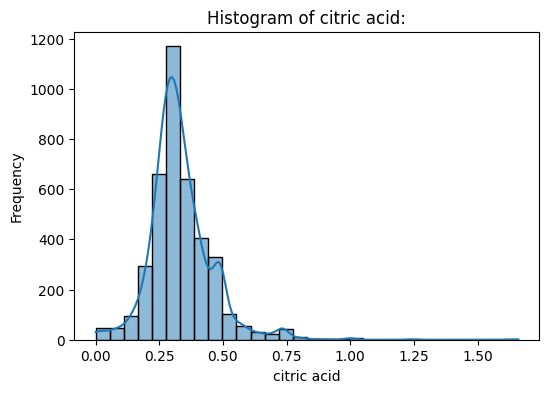

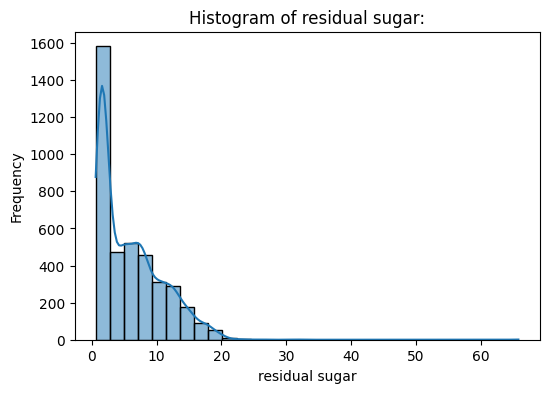

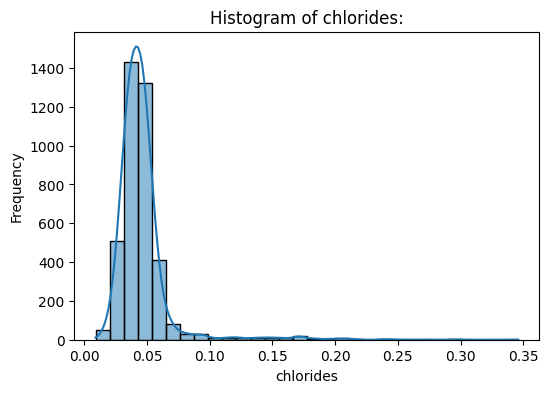

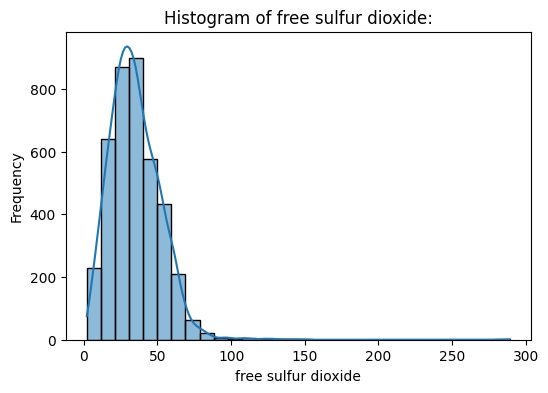

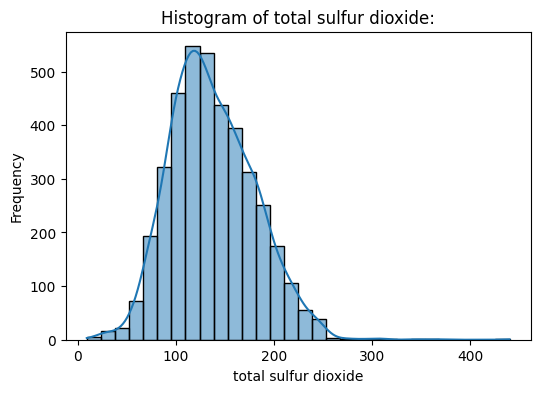

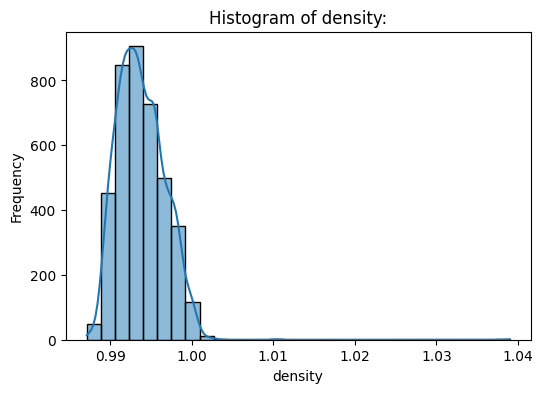

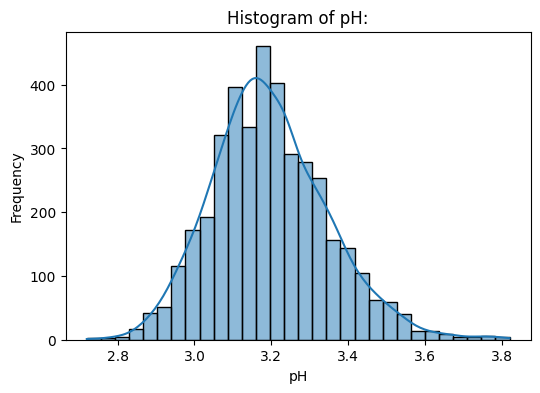

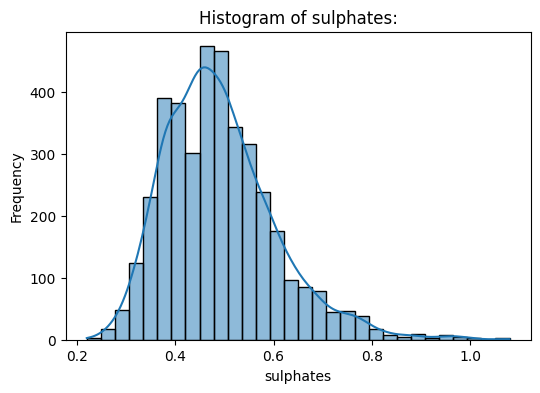

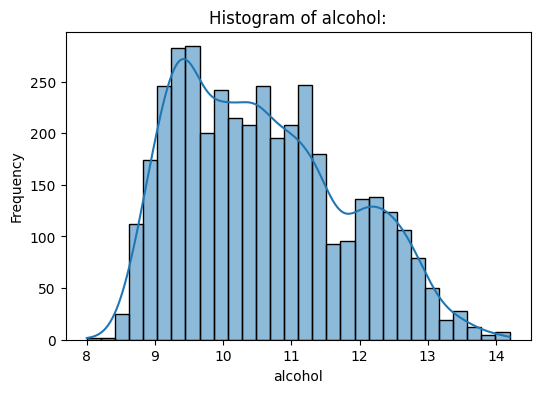

In [52]:
for col in num_col:
    univariate_analysis(df, col)

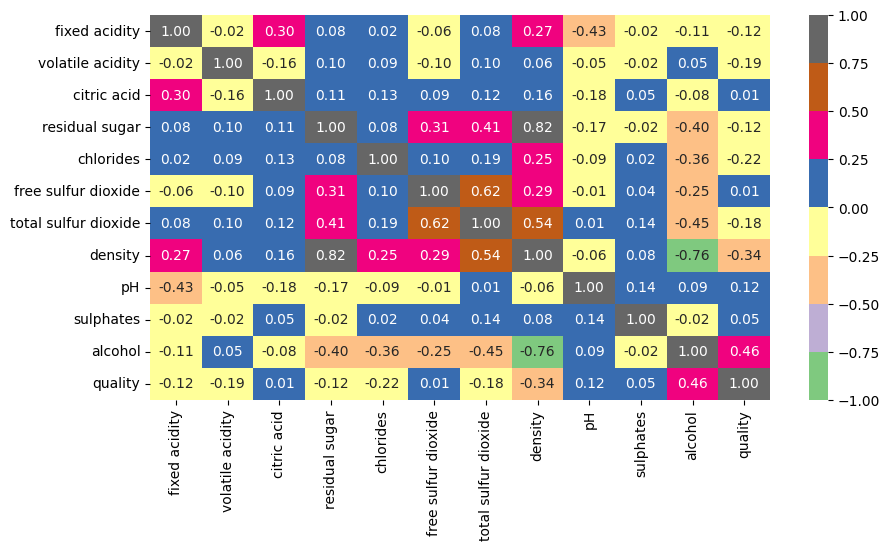

In [53]:
# For the correlation of each feature with the target variable
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
)
plt.show()

In [54]:
# To map the target variable (quality) to a class
# Reclassify the quality ranging from Best to Bad
df = df.replace({"quality": {9:"Best", 8:"Best", 7:"Good", 6:"Good", 5: "Average", 4:"Bad", 3:"Bad"}})

In [55]:
# Splitting the dataset
X = df.drop(columns = ["quality"])

y = df.quality

In [56]:
# Let's scale the features. I will be using 
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

### **3. Build a Base Classification Model**

In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=234)

Training LogisticRegression()...
LogisticRegression() Accuracy:0.686


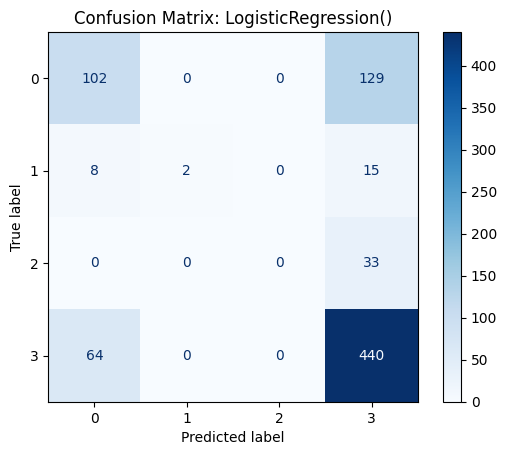

              precision    recall  f1-score   support

     Average       0.59      0.44      0.50       231
         Bad       1.00      0.08      0.15        25
        Best       0.00      0.00      0.00        33
        Good       0.71      0.87      0.79       504

    accuracy                           0.69       793
   macro avg       0.57      0.35      0.36       793
weighted avg       0.66      0.69      0.65       793



c:\Users\Welcome Sir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Welcome Sir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Welcome Sir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [58]:
# Training a model (Taking Logistic Regression)

model_name = LogisticRegression()

# for model_name in model:
print(f"Training {model_name}...")
model_name.fit(X_train, y_train)
y_pred = model_name.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy:{accuracy:.3f}")

# Let's include confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotting with model name as title
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix: {model_name}")
plt.show()

# # Report
print(classification_report(y_test, y_pred))
    

**Short Interpretation of the Above:**
- According to the report above, it can be seen that the model has an accuracy of `(69%)` in predicting the quality of the wine.
- From the `precision`, it shows that the model performed well in learning and remembering having `71% precision` and `87% recall` showing that the more available data to learn from, the precise it will be. 
- It can also be seen that the model performed well in identifying the bad wine quality but couldn't recall. This is due to the fact that there wasn't enough data to learn. 
- There is also a mis distribution of data across all classes.

### **4. Build and Compare Multiple Models**

Training SVM...
SVM Accuracy:0.712


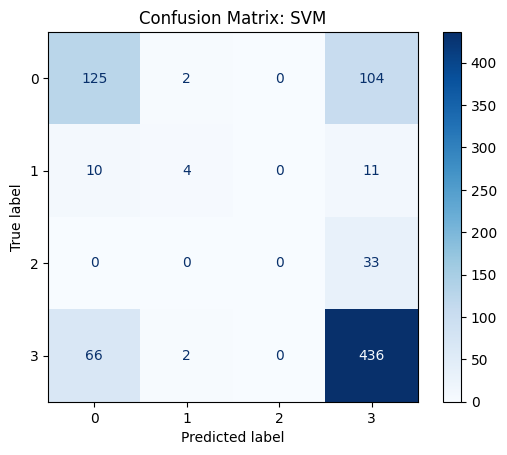

Training Gradient_Boost...
Gradient_Boost Accuracy:0.702


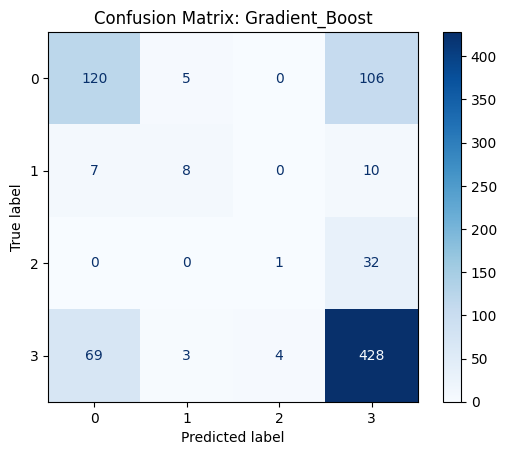

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy:0.667


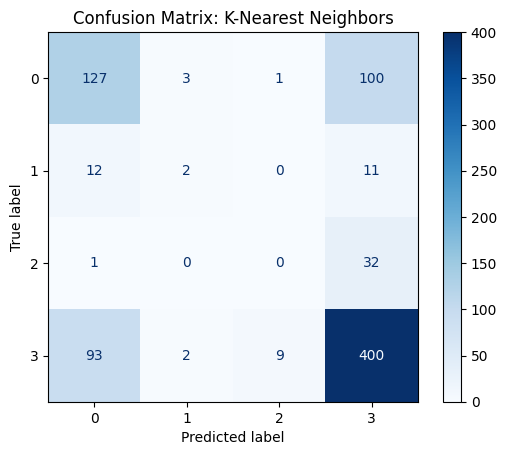

,Model,Accuracy
0,SVM,0.712484
1,Gradient_Boost,0.702396
2,K-Nearest Neighbors,0.667087


In [59]:
# Here, I will be training at least three classification models(Random Forest, GradientBoostingClassifier, K-Nearest Neighbors)

# Models to use
models = {
    "SVM": RandomForestClassifier(),
    "Gradient_Boost": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize a dictionary to store the models 
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy:{accuracy:.3f}")
    
    # Let's include confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot with model name as title
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()
    
# Let print the results in a dataframe for better visualization
results_df= pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df= results_df.sort_values(by='Accuracy', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df
    

**Justification for the choice of best model**
- K-Nearest Neighbor (KNN) is chosen as the best model over all other models (Random Forest and Gradient Boosting) because it was able to predict the best quality across board avoiding `Type II` error to the minimal. 
- KNN had a precision value of `74%` and a recall value of `79%' in identifying the good quality of wine.
- Unlike KNN, other models had a higher accuracy but were not able to avoid both `Type I and Type II` to the minimal

### **5. Optimize Model Using Randomized Search**

In [60]:
# Let's get parameters for k-Nearest Neighbor
kn = KNeighborsClassifier()
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [61]:
# Let's tune k-Nearest Neighbor - Hyperparameters

parameters = {
    "n_neighbors": [3, 5, 7, 9, 15, 25, 50],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": [10, 20, 30, 40, 50],
    "p": [1, 2]
}


# Let's define RandomizedSearchCV
random_search = RandomizedSearchCV( KNeighborsClassifier(), 
        param_distributions=parameters,
        n_iter=20,
        n_jobs=-1,
        cv=5,     
        verbose=1,
        random_state=234
)

random_search.fit(X_train, y_train)
print(f"Best parameters for k-Nearest Neighbor (KNN): {random_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for k-Nearest Neighbor (KNN): {'weights': 'distance', 'p': 2, 'n_neighbors': 50, 'leaf_size': 10, 'algorithm': 'brute'}


c:\Users\Welcome Sir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [0.6600306  0.67612989 0.68307394 0.67360025        nan 0.69317555
 0.65845182 0.69665456 0.68749682 0.70138542 0.68749333 0.68907062
 0.68338342 0.69507129 0.69002297 0.69507129 0.66224279 0.69538525
 0.68686441 0.68244552]
  warnings.warn(


In [62]:
# Cross Validation score for the best model - k-Nearest Neighbor
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)

print(f"Cross-Validation Scores for KNN [Random Search]: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.3f}")


Cross-Validation Scores for KNN [Random Search]: [0.65825977 0.66414141 0.69191919 0.67676768 0.7209596 ]
Mean Cross-Validation Score: 0.682


### **6. Save Model and Scaler**

In [63]:
# Let's save our best model as a pickle file

joblib.dump(best_model, "model.pkl")


# saving the scalar (MinMax scalar used for the feature scaling)
joblib.dump(scaler, "scaler.pkl")

print("Models and Scaler have been saved successfully!")

Models and Scaler have been saved successfully!
